In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])
import numpy as np

In [2]:
# Read in Revenue Files
file_2009 = "../../datasets/subsets/other_metrics/other_met_2009.csv"

other_2009 = pd.read_csv(file_2009)
other_2009 = other_2009.set_index(['STNAME'])
other_2009

,2009_E3A11,2009_E3A12,2009_E3A13,2009_E3A14,2009_E3A2,2009_E3A16,2009_E3A1,2009_E3B11,2009_E3B12,2009_E3B13,...,2009_X12D,2009_X12E,2009_X12F,2009_TX12,2009_NCE13,2009_ADA,2009_A14A,2009_A14B,2009_PPE15,2009_MEMBR
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,147099193,96426640,9553397,195007438,9012202,289313.0,448375981,NaN,NaN,NaN,...,15232367.0,NaN,3414143.0,511893572,6171949738,712179,NaN,712179.0,8666,745668
alaska,18038538,10086332,1100120,24076638,261765,53590.0,53355218,609279.0,261762.0,3047920.0,...,73713.0,799521.0,132378.0,70891210,1936427828,119330,119330.0,NaN,16228,130662
arizona,113707273,34977773,59541573,173188861,17429067,666304.0,382081784,46874991.0,NaN,NaN,...,NaN,2489284.0,NaN,528610182,8198145231,999386,999386.0,NaN,8203,1087817
arkansas,80330214,23484992,5646810,129831335,2131257,178662.0,239472013,16270.0,2725.0,1546600.0,...,NaN,NaN,NaN,283356961,3957482520,439432,439432.0,NaN,9006,478965
california,764859382,311523217,78556093,1081647005,18919951,199836.0,2236785533,80855814.0,34732942.0,20647466.0,...,267066740.0,6680407.0,2228027.0,2423825859,57657103460,6365278,6365278.0,NaN,9058,6322528
colorado,82879620,23124670,13153222,123178507,5427584,1696352.0,244032371,24520422.0,5731502.0,4119532.0,...,1276370.0,439921.0,12717.0,483390306,6703876359,747845,747845.0,NaN,8964,818443
connecticut,67949683,33082404,18219375,92788185,3293213,2998606.0,215038253,45605689.0,10573261.0,11469531.0,...,32326773.0,NaN,318609.0,245753341,8462540318,549776,NaN,549776.0,15393,567198
delaware,22211188,6118122,3025410,28600567,1432521,787006.0,60742293,NaN,NaN,NaN,...,17712039.0,NaN,NaN,57126933,1461658949,119092,NaN,119092.0,12273,125430
district of columbia,3782215,2357143,33065711,1997003,65710,184206.0,41386278,299689.0,47020.0,28640.0,...,4933666.0,282333.0,261127.0,58173324,1294731452,68447,68447.0,NaN,18916,68681


In [3]:
(other_2009.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california      80.625738
texas           60.100292
new york        59.496508
florida         32.786945
pennsylvania    31.561607
dtype: float64

In [4]:
summary_2009 = pd.DataFrame(other_2009.sum(axis=1)/100000000, columns=['Total OtherEx ($100M)'])
summary_2009['NoninstructionalEx ($100M)'] = other_2009.iloc[:,0:14].sum(axis=1)/100000000
summary_2009['CurrentEx ($100M)'] = other_2009.iloc[:,14:15].sum(axis=1)/100000000
summary_2009['Per PupilEx ($)'] = other_2009.iloc[:,44:45].sum(axis=1)


summary_2009

,Total OtherEx ($100M),NoninstructionalEx ($100M),CurrentEx ($100M),Per PupilEx ($)
STNAME,,,,
alabama,92.214259,9.057642,0.0,8666
alaska,25.709717,1.252518,0.0,16228
arizona,117.905249,8.771866,0.0,8203
arkansas,55.353478,4.896712,0.0,9006
california,806.257376,47.908284,0.0,9058
colorado,97.461725,5.733526,0.0,8964
connecticut,108.266358,5.865048,0.0,15393
delaware,20.895137,1.229171,0.0,12273
district of columbia,19.357388,0.869309,0.0,18916


In [5]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2009.csv"

success_2009 = pd.read_csv(dropout_path)
success_2009

,STNAME,2009_DRP912,2009_DRP9,2009_DRP10,2009_DRP11,2009_DRP12,2009_DRPAM,2009_DRPAS,2009_DRPHI,2009_DRPBL,2009_DRPWH
0,alabama,1.500000,1.299999,1.599999,1.700000,1.500000,1.200000,0.700000,1.599999,1.700000,1.400000
1,alaska,7.000000,3.699999,5.399998,9.399994,9.500000,1.200000,NaN,0.200000,0.500000,0.200000
2,arizona,8.299995,8.000000,6.299999,7.899998,11.000000,12.899994,5.000000,10.199997,10.099998,6.099998
3,arkansas,4.099998,2.299999,3.699999,5.199997,5.599998,4.500000,3.799999,4.699997,5.699997,3.500000
4,california,5.000000,2.500000,3.000000,4.099998,11.000000,6.799999,2.400000,6.199997,9.199997,3.199999
5,colorado,6.099998,4.099998,4.500000,6.299999,10.000000,12.299995,3.400000,11.399994,9.599998,3.699999
6,connecticut,3.099998,2.699999,2.799999,3.299999,3.599998,2.400000,0.900000,7.399998,6.799999,1.400000
7,delaware,5.099998,6.099998,5.299999,4.399998,4.399998,5.399998,2.299999,6.599998,6.899998,4.099998
8,district of columbia,7.000000,8.099998,5.899998,4.199997,4.000000,NaN,5.299999,8.299995,6.899998,4.799999
9,florida,2.599998,2.400000,2.599998,2.699999,2.900000,2.900000,0.900000,3.000000,4.299999,1.799999


In [6]:
summary_2009['Dropout Rate'] = ''

for i in range(len(success_2009)):
    summary_2009['Dropout Rate'][i] = success_2009['2009_DRP912'][i].astype(float)
    
summary_2009

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Total OtherEx ($100M),NoninstructionalEx ($100M),CurrentEx ($100M),Per PupilEx ($),Dropout Rate
STNAME,,,,,
alabama,92.214259,9.057642,0.0,8666,1.5
alaska,25.709717,1.252518,0.0,16228,7
arizona,117.905249,8.771866,0.0,8203,8.3
arkansas,55.353478,4.896712,0.0,9006,4.1
california,806.257376,47.908284,0.0,9058,5
colorado,97.461725,5.733526,0.0,8964,6.1
connecticut,108.266358,5.865048,0.0,15393,3.1
delaware,20.895137,1.229171,0.0,12273,5.1
district of columbia,19.357388,0.869309,0.0,18916,7


In [7]:
summary_2009['Dropout Rate'] = ''

for i in range(len(success_2009)):
    summary_2009['Dropout Rate'][i] = success_2009['2009_DRP912'][i].astype(float)
    

summary_2009 = summary_2009[summary_2009['Dropout Rate'].notna()]
summary_2009['Dropout Rate'] = summary_2009['Dropout Rate'].astype(float)
summary_2009.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total OtherEx ($100M)       51 non-null     float64
 1   NoninstructionalEx ($100M)  51 non-null     float64
 2   CurrentEx ($100M)           51 non-null     float64
 3   Per PupilEx ($)             51 non-null     int64  
 4   Dropout Rate                51 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.4+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


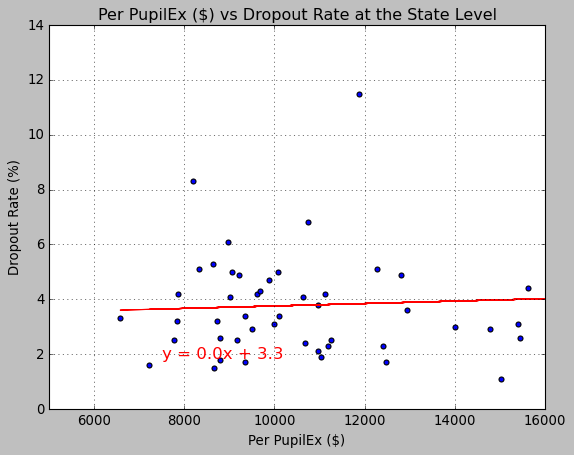

The correlation between both factors is 0.0677


In [8]:
# Total Support vs Dropout Rate
x_values = summary_2009['Per PupilEx ($)']
y_values = summary_2009['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7500,1.85),fontsize=15,color="red")
plt.xlabel('Per PupilEx ($)')
plt.ylabel('Dropout Rate (%)')
plt.title('Per PupilEx ($) vs Dropout Rate at the State Level')
plt.xlim(left = 5000, right = 16000)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

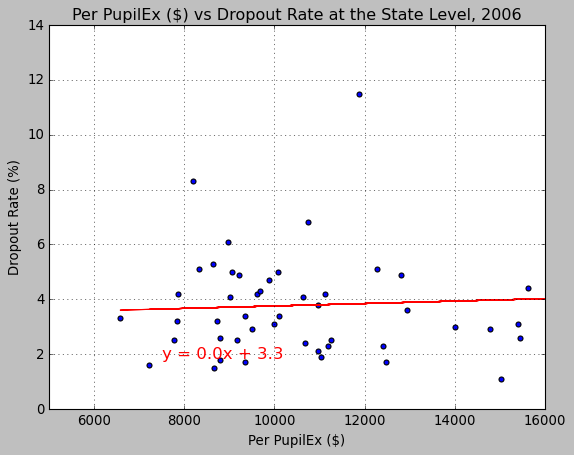

The correlation between both factors is 0.0677


In [9]:
# Total Support vs Dropout Rate
x_values = summary_2009['Per PupilEx ($)']
y_values = summary_2009['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7500,1.85),fontsize=15,color="red")
plt.xlabel('Per PupilEx ($)')
plt.ylabel('Dropout Rate (%)')
plt.title('Per PupilEx ($) vs Dropout Rate at the State Level, 2006')
plt.xlim(left = 5000, right = 16000)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")